# Question Answering with BERT Models
## A Comprehensive Guide to Using Transformer Models for QA Tasks

### Introduction
This notebook demonstrates the implementation of question-answering systems using various BERT-based models, supporting both English and Hindi languages. It covers the fundamentals of text encoding, model inference, and answer extraction.

Let's go through each section with detailed documentation and comments:

### 1. Initial Setup and Imports


In [ ]:
# Import essential libraries for BERT-based question answering
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch



### 2. Model Loading
Theory: BERT models require both a model for inference and a tokenizer for text processing.


In [ ]:
# Load BERT model fine-tuned on SQuAD dataset
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

# Initialize model and tokenizer
model = BertForQuestionAnswering.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)



### 3. Text Processing and Embeddings
Theory: BERT processes text by tokenizing and encoding it into numerical representations.


In [ ]:
# Define example question and context
question = "When was the first dvd released?"
answer_document = "The first DVD (Digital Versatile Disc) was released on March 24, 1997..."

# Create token embeddings using BERT tokenizer
encoding = tokenizer.encode_plus(text=question, text_pair=answer_document)

# Extract token IDs and segment embeddings
inputs = encoding['input_ids']  # Numerical representations of tokens
sentence_embedding = encoding['token_type_ids']  # Distinguishes question from context
tokens = tokenizer.convert_ids_to_tokens(inputs)  # Convert IDs back to readable tokens



### 4. Model Inference
Theory: BERT predicts answer spans by identifying start and end positions in the text.


In [ ]:
# Get model predictions
output = model(
    input_ids=torch.tensor([inputs]), 
    token_type_ids=torch.tensor([sentence_embedding])
)

# Find most likely start and end positions
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)



### 5. Hindi Language Support
Theory: Multilingual models like MuRIL enable question-answering in non-English languages.


In [ ]:
# Import configurations and required modules
import myconfig
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

# Initialize MuRIL model for Hindi language support
model_name_hi = "google/muril-large-cased"  # Specialized for Indian languages
tokenizer_hi = AutoTokenizer.from_pretrained(model_name_hi, use_auth_token=hf_api_key)
model_hi = AutoModelForQuestionAnswering.from_pretrained(model_name_hi, use_auth_token=hf_api_key)



### 6. QA Function Implementation
Theory: Question answering requires preprocessing, model inference, and post-processing steps.


In [ ]:
def faq_bot(model, tokenizer, question, context):
    # Encode input texts
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    # Create segment IDs to differentiate question from context
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    # Get model predictions
    output = model(
        torch.tensor([input_ids]), 
        token_type_ids=torch.tensor([segment_ids])
    )
    
    # Extract and process answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    
    # Return formatted answer
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
        return clean_answer(answer)
    return "Cannot find answer"



### 7. Alternative Models
Theory: Different BERT variants offer different trade-offs between speed and accuracy.


In [ ]:
# RoBERTa: Optimized version of BERT
from transformers import RobertaTokenizer, RobertaModel
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

# DistilBERT: Lighter, faster version of BERT
from transformers import DistilBertTokenizer, DistilBertModel 
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)



## Usage Notes
- Maximum sequence length: 512 tokens
- Requires HuggingFace API token for model downloads
- MuRIL model recommended for Hindi text
- Consider using DistilBERT for faster inference
- Use attention masks for better prediction accuracy

## Requirements
- transformers
- torch
- matplotlib
- seaborn
- HuggingFace API access

In [4]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

## Load model and tokenizer

In [40]:
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

In [41]:
model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
tokenizer = BertTokenizer.from_pretrained(model_name)

## Embeddings

In [8]:
# example question and text containing the answer
question = "When was the first dvd released?"
answer_document = "The first DVD (Digital Versatile Disc) was released on March 24, 1997. It was a movie titled 'Twister' and was released in Japan. DVDs quickly gained popularity as a replacement for VHS tapes and became a common format for storing and distributing digital video and data."

In [10]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_document)

In [11]:
print(type(encoding))

<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [12]:
inputs = encoding['input_ids']
sentence_embedding = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [13]:
tokenizer.decode(101)

'[CLS]'

In [14]:
tokenizer.decode(102)

'[SEP]'

In [15]:
output = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embedding]))

## Model output

In [16]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

print(start_index)
print(end_index)

tensor(20)
tensor(23)


In [17]:
answer = ' '.join(tokens[start_index:end_index+1])
print(answer)

march 24 , 1997


In [18]:
import matplotlib as plt
import seaborn as sns

In [19]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [20]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))
print(token_labels)

['[CLS] -  0', 'when -  1', 'was -  2', 'the -  3', 'first -  4', 'dvd -  5', 'released -  6', '? -  7', '[SEP] -  8', 'the -  9', 'first - 10', 'dvd - 11', '( - 12', 'digital - 13', 'versatile - 14', 'disc - 15', ') - 16', 'was - 17', 'released - 18', 'on - 19', 'march - 20', '24 - 21', ', - 22', '1997 - 23', '. - 24', 'it - 25', 'was - 26', 'a - 27', 'movie - 28', 'titled - 29', "' - 30", 'twist - 31', '##er - 32', "' - 33", 'and - 34', 'was - 35', 'released - 36', 'in - 37', 'japan - 38', '. - 39', 'dvds - 40', 'quickly - 41', 'gained - 42', 'popularity - 43', 'as - 44', 'a - 45', 'replacement - 46', 'for - 47', 'vhs - 48', 'tapes - 49', 'and - 50', 'became - 51', 'a - 52', 'common - 53', 'format - 54', 'for - 55', 'storing - 56', 'and - 57', 'distributing - 58', 'digital - 59', 'video - 60', 'and - 61', 'data - 62', '. - 63', '[SEP] - 64']


C:\Users\cdac\AppData\Local\Temp\ipykernel_33044\3367475488.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


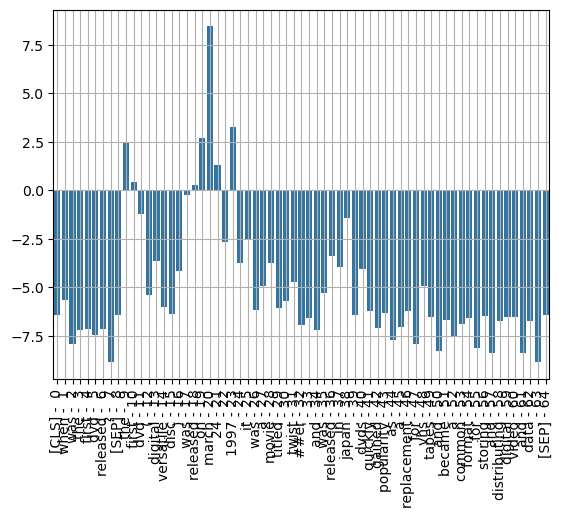

In [21]:
ax = sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center") 
ax.grid(True) 

C:\Users\cdac\AppData\Local\Temp\ipykernel_33044\2800425266.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


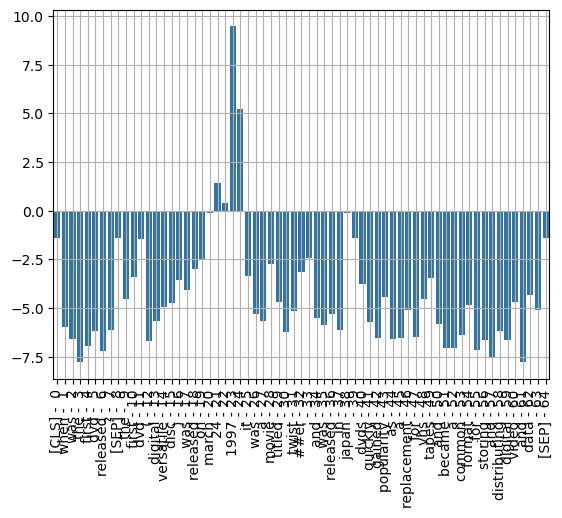

In [22]:
ax = sns.barplot(x=token_labels, y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center") 
ax.grid(True) 

## Question Answering

In [ ]:
#sunset_motors_context = "Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar panels to power the facility, energy-efficient lighting, and a comprehensive recycling program. This commitment to eco-consciousness has earned Sunset Motors recognition as an industry leader in sustainable automotive retail. Sunset Motors proudly offers a diverse range of vehicles, including popular brands like Ford, Toyota, Honda, Chevrolet, and BMW, catering to a wide spectrum of tastes and preferences. In addition to its outstanding vehicle selection, Sunset Motors offers flexible financing options, allowing customers to secure affordable loans and leases with competitive interest rates."
#print(sunset_motors_context)
premchand_lit_context = "मुंशी प्रेमचंद हिंदी साहित्य के एक महान उपन्यासकार और कथाकार थे, जिन्हें 'उपन्यास सम्राट' भी कहा जाता है। उनका मूल नाम धनपत राय श्रीवास्तव था और उनका जन्म 1880 में हुआ था। उन्होंने अपने लेखन के माध्यम से गरीबी, अन्याय और सामाजिक शोषण जैसे विषयों को चित्रित किया। उनकी प्रमुख रचनाओं में 'गोदान', 'गबन', 'कर्मभूमि', 'सेवासदन' और 'निर्मला' शामिल हैं। प्रेमचंद ने लगभग डेढ़ दर्जन उपन्यास और 300 से अधिक कहानियाँ लिखीं। उपन्यास गोदान, गबन, कर्मभूमि, प्रेमाश्रम, रंगभूमि, निर्मला आदि। 'ईदगाह', 'कफ़न', 'पूस की रात', 'बड़े भाई साहब' और 'पंच परमेश्वर' जैसी उनकी कहानियाँ आज भी जीवंत हैं। नाटक संग्राम, कर्बला। वे हिंदी और उर्दू दोनों भाषाओं के जानकार थे, जिसकी वजह से उनकी शैली सरल, सजीव और प्रभावशाली थी। उन्होंने कई पत्रिकाओं का संपादन किया, जैसे 'मर्यादा', 'माधुरी', और 'हंस'। प्रेमचंद के साहित्य में किसानों, मजदूरों और आम लोगों के जीवन की सच्चाइयों को यथार्थवादी ढंग से दर्शाया गया है, जिससे हिंदी साहित्य को नई दिशा मिली। जन्म 31 जुलाई 1880 को वाराणसी के लमही गाँव में हुआ था। गरीबी और पिता की मृत्यु के कारण उनका बचपन कष्टों भरा था। उनका असली नाम धनपत राय था, लेकिन उन्होंने प्रेमचंद नाम से प्रसिद्धी पाई। उर्दू में वे 'नवाबराय' नाम से लिखते थे, लेकिन ब्रिटिश सरकार द्वारा उनकी रचनाओं पर प्रतिबंध के बाद उन्होंने 'प्रेमचंद' उपनाम अपना लिया। 8 अक्टूबर 1936 को उनका निधन हो गया।"
print(premchand_lit_context)
print(len(premchand_lit_context.split(' ')))
# Import required libraries
import myconfig
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

#HF token
hf_api_key = myconfig.hf_api_key

# Use multilingual BERT model instead
#model_name_hi = "bert-base-multilingual-cased"  # or "ai4bharat/indic-bert" for better Hindi support
#model_name_hi = "ai4bharat/indic-bert"
model_name_hi = "google/muril-large-cased"
#model_name_hi = "deepset/bert-base-multilingual-cased-squad2"
#model_name_hi = "FacebookAI/xlm-roberta-base"
tokenizer_hi = AutoTokenizer.from_pretrained(model_name_hi, use_auth_token=hf_api_key)
model_hi = AutoModelForQuestionAnswering.from_pretrained(model_name_hi, use_auth_token=hf_api_key)

मुंशी प्रेमचंद हिंदी साहित्य के एक महान उपन्यासकार और कथाकार थे, जिन्हें 'उपन्यास सम्राट' भी कहा जाता है। उनका मूल नाम धनपत राय श्रीवास्तव था और उनका जन्म 1880 में हुआ था। उन्होंने अपने लेखन के माध्यम से गरीबी, अन्याय और सामाजिक शोषण जैसे विषयों को चित्रित किया। उनकी प्रमुख रचनाओं में 'गोदान', 'गबन', 'कर्मभूमि', 'सेवासदन' और 'निर्मला' शामिल हैं। प्रेमचंद ने लगभग डेढ़ दर्जन उपन्यास और 300 से अधिक कहानियाँ लिखीं। उपन्यास गोदान, गबन, कर्मभूमि, प्रेमाश्रम, रंगभूमि, निर्मला आदि। 'ईदगाह', 'कफ़न', 'पूस की रात', 'बड़े भाई साहब' और 'पंच परमेश्वर' जैसी उनकी कहानियाँ आज भी जीवंत हैं। नाटक संग्राम, कर्बला। वे हिंदी और उर्दू दोनों भाषाओं के जानकार थे, जिसकी वजह से उनकी शैली सरल, सजीव और प्रभावशाली थी। उन्होंने कई पत्रिकाओं का संपादन किया, जैसे 'मर्यादा', 'माधुरी', और 'हंस'। प्रेमचंद के साहित्य में किसानों, मजदूरों और आम लोगों के जीवन की सच्चाइयों को यथार्थवादी ढंग से दर्शाया गया है, जिससे हिंदी साहित्य को नई दिशा मिली। जन्म 31 जुलाई 1880 को वाराणसी के लमही गाँव में हुआ था। गरीबी और पिता की मृत्यु क

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

c:\Users\cdac\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cdac\.cache\huggingface\hub\models--FacebookAI--xlm-roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForQuestionAnswering were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [92]:
def faq_bot(model,tokenizer,question,context):
    context = context
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    #print(tokens)
    
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx+1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    output = model(torch.tensor([input_ids]), token_type_ids = torch.tensor([segment_ids]))
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    #print(answer_start)
    #print(answer_end)
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
    else:
        print("I don't know how to answer this question, can you ask another one?")
        return
    corrected_answer = ''
    for word in answer.split():
        if word[0:2] == '##':
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    return corrected_answer
'''
def faq_bot1(model, tokenizer, question, context, max_length=512):
    # Encode with proper truncation and attention masks
    encoding = tokenizer.encode_plus(
        question,
        context,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='pt',
        return_attention_mask=True
    )
    
    # Get model outputs with attention mask
    outputs = model(
        input_ids=encoding['input_ids'],
        token_type_ids=encoding['token_type_ids'],
        attention_mask=encoding['attention_mask']
    )
    
    # Get probability scores
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    
    # Find answer tokens indices
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)
    
    # Validate answer span
    if answer_end < answer_start or answer_end - answer_start > 50:
        return "Cannot find a valid answer in the context"
        
    # Get answer tokens
    input_ids = encoding['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer = tokens[answer_start:answer_end + 1]
    
    # Clean special tokens and join
    answer = ' '.join(answer)
    answer = answer.replace('[CLS]', '').replace('[SEP]', '').replace('[PAD]', '')
    answer = ' '.join(answer.split())  # Clean extra spaces
    
    # Handle subword tokens
    answer = answer.replace(' ##', '')
    
    return answer.strip()
'''

'\ndef faq_bot1(model, tokenizer, question, context, max_length=512):\n    # Encode with proper truncation and attention masks\n    encoding = tokenizer.encode_plus(\n        question,\n        context,\n        max_length=max_length,\n        truncation=True,\n        padding=\'max_length\',\n        return_tensors=\'pt\',\n        return_attention_mask=True\n    )\n    \n    # Get model outputs with attention mask\n    outputs = model(\n        input_ids=encoding[\'input_ids\'],\n        token_type_ids=encoding[\'token_type_ids\'],\n        attention_mask=encoding[\'attention_mask\']\n    )\n    \n    # Get probability scores\n    start_scores = outputs.start_logits\n    end_scores = outputs.end_logits\n    \n    # Find answer tokens indices\n    answer_start = torch.argmax(start_scores)\n    answer_end = torch.argmax(end_scores)\n    \n    # Validate answer span\n    if answer_end < answer_start or answer_end - answer_start > 50:\n        return "Cannot find a valid answer in the co

In [93]:
faq_bot(model=model_hi, tokenizer=tokenizer_hi,question="मुंशी प्रेमचंद का जन्म कब हुआ था?", context=premchand_lit_context)

IndexError: index out of range in self

In [85]:
#faq_bot("what make of cars are available?")
faq_bot(model=model_hi, tokenizer=tokenizer_hi,question="उनकी मुख्य कहानियाँ कौन सी हैं?", context=premchand_lit_context)

" अधिक कहानियाँ लिखीं । उपन्यास गोदान , गबन , कर्मभूमि , प्रेमाश्रम , रंगभूमि , निर्मला आदि । ' ईदगाह ' , ' कफ़न ' , ' पूस की रात ' , ' बड़े भाई साहब ' और ' पंच परमेश्वर ' जैसी उनकी कहानियाँ आज भी जीवंत हैं । नाटक संग्राम , कर्बला । वे हिंदी और उर्दू दोनों भाषाओं के जानकार थे , जिसकी वजह से उनकी शैली सरल , सजीव और प्रभावशाली थी । उन्होंने कई पत्रिकाओं का संपादन किया , जैसे ' मर्यादा ' , ' माधुरी ' , और ' हंस ' । प्रेमचंद के साहित्य में किसानों , मजदूरों"

In [86]:
#faq_bot("how large is the dealership?") 
faq_bot(model=model_hi, tokenizer=tokenizer_hi,question="उपन्यास सम्राट किसे कहा जाता है?", context=premchand_lit_context)

" अधिक कहानियाँ लिखीं । उपन्यास गोदान , गबन , कर्मभूमि , प्रेमाश्रम , रंगभूमि , निर्मला आदि । ' ईदगाह ' , ' कफ़न ' , ' पूस की रात ' , ' बड़े भाई साहब ' और ' पंच परमेश्वर ' जैसी उनकी कहानियाँ आज भी जीवंत हैं । नाटक संग्राम , कर्बला । वे हिंदी और उर्दू दोनों भाषाओं के जानकार थे , जिसकी वजह से उनकी शैली सरल , सजीव और प्रभावशाली थी । उन्होंने कई पत्रिकाओं का संपादन किया , जैसे ' मर्यादा ' , ' माधुरी ' , और ' हंस ' । प्रेमचंद के साहित्य में किसानों , मजदूरों"

## RoBERTa and DistilBERT

In [22]:
from transformers import RobertaTokenizer, RobertaModel
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
from transformers import  DistilBertTokenizer, DistilBertModel 
model_name = "distilbert-base-uncased"
tokenizer =  DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)